<a href="https://colab.research.google.com/github/afrahhassan/afrahhassan/blob/main/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# <div align="center"><font>  </font></div>
# <div align="center"><font> COSC 2793 Computational Machine Learning </font></div>
## <div align="center"> <font> Assignment 2: Machine Learning Project </font></div>
## <div align="center"> <font> S3930776 Afrah Hassan A Alshaikh Ali & S3569266 Chang Su </font></div>
---

In [2]:
#Import Libraries
import os
import csv
import zipfile
import pandas as pd
import cv2
import numpy as np


Workflow
We need to follow the below 4 steps to build our traffic sign classification model:

Dataset exploration
CNN model building
Model training and validation
Model testing
https://www.analyticsvidhya.com/blog/2021/12/traffic-signs-recognition-using-cnn-and-keras-in-python/


# **1. Load and Preprocess the Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir('/content/drive/MyDrive/Assignment2')

['assignment2_PG.pdf',
 'COSC2673_2793_A2_EOI_.docx',
 'trafficsigns_dataset (1)',
 'assignment2.ipynb',
 'trafficsigns_dataset',
 'trafficsigns_dataset.zip',
 'shape.csv',
 'type.csv',
 'image_data.csv']

In [6]:
!cp -r "/content/drive/MyDrive/Assignment2" .

In [35]:
zip_file_path = '/content/drive/My Drive/Assignment2/trafficsigns_dataset.zip'
extract_to_path = '/content/trafficsigns_dataset'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
print("Extraction completed!")

Extraction completed!


Load the images and corresponding labels from the dataset.

### Export shape to csv


In [36]:
import os
import csv

root_dir = '/content/trafficsigns_dataset'
output_csv = '/content/drive/My Drive/Assignment2/shape.csv'

entry_count = 0

with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'class'])

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                full_path = os.path.join(root, file)
                class_name = os.path.basename(os.path.dirname(root))
                writer.writerow([full_path, class_name])
                entry_count += 1  # Increment the counter for each image processed

print(f"CSV file has been created successfully with {entry_count} entries.")


CSV file has been created successfully with 3699 entries.


### Export type to csv

In [37]:
import os
import csv

# Define the root directory containing the images and the output CSV file path
root_dir = '/content/trafficsigns_dataset'
output_csv = '/content/drive/My Drive/Assignment2/type.csv'

# Initialize the counter for the number of entries
entry_count = 0

# Open the CSV file for writing
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['image_path', 'class'])

    # Traverse through the directory structure
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            # Check if the file has one of the specified extensions
            if file.endswith(('.png', '.jpg', '.jpeg')):
                # Construct the full path to the image
                full_path = os.path.join(root, file)
                # Get the class name from the direct parent directory
                class_name = os.path.basename(root)
                # Write the image path and class name to the CSV
                writer.writerow([full_path, class_name])
                # Increment the counter for each entry written
                entry_count += 1

# Print the total number of entries written to the CSV file
print(f"CSV file has been created successfully with {entry_count} entries.")


CSV file has been created successfully with 3699 entries.


In [38]:
# Load the data from the CSV file
data_1 = pd.read_csv('/content/drive/My Drive/Assignment2/shape.csv')
data_1.head()

,image_path,class
0,/content/trafficsigns_dataset/trafficsigns_dat...,hex
1,/content/trafficsigns_dataset/trafficsigns_dat...,hex
2,/content/trafficsigns_dataset/trafficsigns_dat...,hex
3,/content/trafficsigns_dataset/trafficsigns_dat...,hex
4,/content/trafficsigns_dataset/trafficsigns_dat...,hex


In [39]:
# Find the number of unique types/classes
num_shapes = data_1['class'].nunique()

# Get the count of each unique type/class
shape_counts = data_1['class'].value_counts()

print("Number of unique shapes:", num_shapes)
print("unique shapes:", shape_counts)


Number of unique shapes: 5
unique shapes: class
round       1760
triangle     926
square       688
diamond      282
hex           43
Name: count, dtype: int64


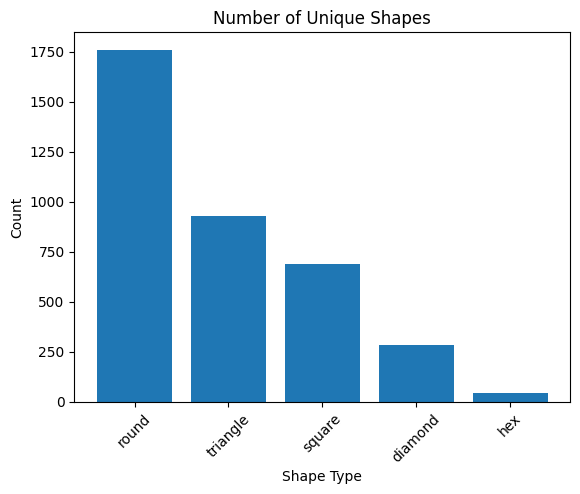

In [40]:
#Plot the shapes
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract data for plotting
class_names = shape_counts.index.to_list()
class_counts = shape_counts.to_numpy()

# Create a bar plot
plt.bar(class_names, class_counts)

# Add title and labels
plt.title("Number of Unique Shapes")
plt.xlabel("Shape Type")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [41]:
# Load the data from the CSV file
data_2 = pd.read_csv('/content/drive/My Drive/Assignment2/type.csv')
data_2.head()


,image_path,class
0,/content/trafficsigns_dataset/trafficsigns_dat...,stop
1,/content/trafficsigns_dataset/trafficsigns_dat...,stop
2,/content/trafficsigns_dataset/trafficsigns_dat...,stop
3,/content/trafficsigns_dataset/trafficsigns_dat...,stop
4,/content/trafficsigns_dataset/trafficsigns_dat...,stop


In [42]:
# Find the number of unique types/classes
num_types = data_2['class'].nunique()
# Get the count of each unique type/class
type_counts = data_2['class'].value_counts()

print("Number of unique types:", num_types)
print("unique types:", type_counts)

Number of unique types: 16
unique types: class
warning             695
noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
giveway             231
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: count, dtype: int64


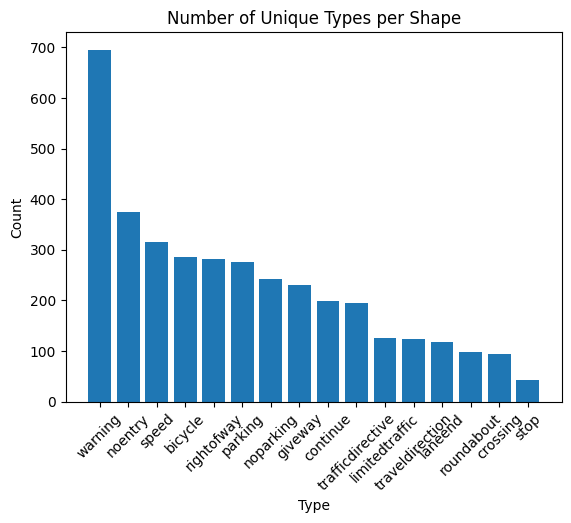

In [43]:
#Plot the types
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract data for plotting
class_names = type_counts.index.to_list()
class_counts = type_counts.to_numpy()

# Create a bar plot
plt.bar(class_names, class_counts)

# Add title and labels
plt.title("Number of Unique Types per Shape")
plt.xlabel("Type")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [44]:
print('The dataset has {} shapes'.format(len(data_1['class'].unique())))
print('The dataset has {} types'.format(len(data_2['class'].unique())))

The dataset has 5 shapes
The dataset has 16 types


EDA

In [45]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3699 non-null   object
 1   class       3699 non-null   object
dtypes: object(2)
memory usage: 57.9+ KB


In [46]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3699 non-null   object
 1   class       3699 non-null   object
dtypes: object(2)
memory usage: 57.9+ KB


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

def load_images_from_csv(csv_file_path, image_folder, target_size):
    # Read the CSV file containing image paths
    data = pd.read_csv(csv_file_path)

    image_arrays = []
    for index, row in data.iterrows():
        # Construct the full path to the image file
        full_path = os.path.join(image_folder, row['image_path'])

        # Load the image using OpenCV
        image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)

        # Check if the loaded image is empty
        if image is None:
            continue

        # Resize the image to the target size
        resized_image = cv2.resize(image, target_size)

        # Convert the resized image to a numpy array
        image_array = np.array(resized_image)

        # Append the image array to the list
        image_arrays.append(image_array)

    # Convert the list of arrays to a numpy array
    image_arrays = np.array(image_arrays)

    return image_arrays

# Example usage
csv_file_path = "/content/drive/My Drive/Assignment2/type.csv"
image_folder = "/content/drive/My Drive/Assignment2"
target_size = (28, 28)

image_arrays = load_images_from_csv(csv_file_path, image_folder, target_size)
print("Shape of the numpy array:", image_arrays.shape)

Shape of the numpy array: (3699, 28, 28)


In [ ]:
image_arrays

array([[[255, 255, 254, ..., 188, 140, 249],
        [255, 255, 255, ..., 191, 142, 251],
        [255, 255, 255, ..., 188, 148, 247],
        ...,
        [255, 255, 255, ..., 252, 255, 251],
        [255, 254, 255, ..., 246, 245, 246],
        [255, 255, 254, ..., 251, 251, 251]],

       [[129, 128, 121, ..., 116, 103, 104],
        [124, 125, 125, ..., 101, 101, 109],
        [113, 110, 112, ..., 106,  97,  95],
        ...,
        [ 67,  67,  92, ...,  65,  75,  69],
        [ 69,  71,  77, ...,  73,  81,  76],
        [ 79,  71,  75, ...,  68,  68,  74]],

       [[234, 215, 227, ..., 255, 252, 158],
        [235, 245, 244, ..., 255, 254, 244],
        [195, 201, 180, ..., 255, 254, 254],
        ...,
        [120, 132, 180, ...,  28,  22,  23],
        [241, 247, 245, ...,  27,  22,  22],
        [248, 238, 111, ...,  29,  22,  21]],

       ...,

       [[ 48,  37,  29, ...,  40,  33,  27],
        [ 42,  34,  32, ...,  34,  29,  28],
        [ 46,  38,  38, ...,  28,  34,  35

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

def load_images_from_csv(csv_file_path, image_folder, target_size):
    # Read the CSV file containing image paths
    data = pd.read_csv(csv_file_path)

    image_arrays = []
    for index, row in data.iterrows():
        # Construct the full path to the image file
        full_path = os.path.join(image_folder, row['image_path'])

        # Load the image using OpenCV
        image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)

        # Check if the loaded image is empty
        if image is None:
            continue

        # Resize the image to the target size
        resized_image = cv2.resize(image, target_size)

        # Convert the resized image to a numpy array
        image_array = np.array(resized_image)

        # Append the image array to the list
        image_arrays.append(image_array)

    # Convert the list of arrays to a numpy array
    image_arrays = np.array(image_arrays)

    return image_arrays

# Example usage
csv_file_path = "/content/drive/My Drive/Assignment2/shape.csv"
image_folder = "/content/drive/My Drive/Assignment2"
target_size = (28, 28)

image_arrays_2 = load_images_from_csv(csv_file_path, image_folder, target_size)
print("Shape of the numpy array:", image_arrays.shape)

Shape of the numpy array: (3699, 28, 28)


In [ ]:
image_arrays_2

array([[[255, 255, 254, ..., 188, 140, 249],
        [255, 255, 255, ..., 191, 142, 251],
        [255, 255, 255, ..., 188, 148, 247],
        ...,
        [255, 255, 255, ..., 252, 255, 251],
        [255, 254, 255, ..., 246, 245, 246],
        [255, 255, 254, ..., 251, 251, 251]],

       [[129, 128, 121, ..., 116, 103, 104],
        [124, 125, 125, ..., 101, 101, 109],
        [113, 110, 112, ..., 106,  97,  95],
        ...,
        [ 67,  67,  92, ...,  65,  75,  69],
        [ 69,  71,  77, ...,  73,  81,  76],
        [ 79,  71,  75, ...,  68,  68,  74]],

       [[234, 215, 227, ..., 255, 252, 158],
        [235, 245, 244, ..., 255, 254, 244],
        [195, 201, 180, ..., 255, 254, 254],
        ...,
        [120, 132, 180, ...,  28,  22,  23],
        [241, 247, 245, ...,  27,  22,  22],
        [248, 238, 111, ...,  29,  22,  21]],

       ...,

       [[ 48,  37,  29, ...,  40,  33,  27],
        [ 42,  34,  32, ...,  34,  29,  28],
        [ 46,  38,  38, ...,  28,  34,  35

Convert images to numbers


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# encoder = LabelEncoder()

# # Encode the "class" column in shape.csv
# main['class'] = encoder.fit_transform(main['class'])


# # Now both "shape" and "type" columns are encoded


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # Create separate LabelEncoder objects for shape and type
# shape_encoder = LabelEncoder()
# type_encoder = LabelEncoder()

# # Encode the shape and type columns
# data_1['shape_encoded'] = shape_encoder.fit_transform(data_1['class'])  #7398
# data_2['type_encoded'] = type_encoder.fit_transform(data_2['class'])  #7398

# # Now you can train your models using the encoded columns

# **2. Split the Data**

# **3. Choose a Model**


Baseline Model


# **4. Train the Model**


# **5. Evaluate the Model**